In [1]:
import astropy as ap
import astropy.io.fits as ap_fits
import astropy.modeling as ap_mod
import copy
import glob
import inspect
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import numpy.ma as np_ma
import scipy as sp
import scipy.optimize as sp_opt
import scipy.stats as sp_stat
import warnings as warn

import IfA_Smeargle as ifas

In [2]:
first_run = ifas.yankee.SmeargleConfig('FirstRun.ifaspkl')

first_run.BravoConfig.voltpat_rename_config['archive_data'] = False
first_run.BravoConfig.detector_name = {'name': 'SAPHIRA-T40K'}

print(first_run)


< Configuration Class --- SmeargleConfig > 
╓ SmeargleConfig Parameters:
╟  BravoConfig ↴ 
< Configuration Class --- BravoConfig > 
╓ BravoConfig Parameters:
╟  detector_name ⇀ {'name': 'SAPHIRA-T40K'}
╟  voltpat_rename_config ⇀ {'voltage_pattern': [2.5, 4.5, 6.5, 8.5, 9.5, 10.5, 11.5, 11.5, 10.5, 9.5, 8.5, 6.5, 4.5, 2.5], 'begin_garbage': 1, 'archive_data': False}
╟  avg_endpts_persec_config ⇀ {'start_chunk': None, 'end_chunk': None, 'frame_exposure_time': None}
╟  avg_endpts_perksec_config ⇀ {'start_chunk': None, 'end_chunk': None, 'frame_exposure_time': None}
╙------------------------------------------
</ Configuration Class --- BravoConfig >
╟  EchoConfig ↴ 
< Configuration Class --- EchoConfig > 
╓ EchoConfig Parameters:
╟  echo010_config ⇀ {'run': False}
╟  echo120_config ⇀ {'run': False, 'x_range': None, 'y_range': None}
╟  echo170_config ⇀ {'run': True, 'sigma_multiple': 5, 'bin_size': 5}
╟  echo270_config ⇀ {'run': False, 'minimum_value': None}
╟  echo271_config ⇀ {'run': Fal

C:\Users\Tripp\Desktop\PROGRAM\IfA_Smeargle\echo\echo_functions.py:102: MaskingWarning: The masking routine < echo170_gaussian_truncation > did not mask any pixels.
  msk_rou=filter_name))
C:\Users\Tripp\Desktop\PROGRAM\IfA_Smeargle\echo\echo_functions.py:102: MaskingWarning: The masking routine < echo170_gaussian_truncation > did not mask any pixels.
  msk_rou=filter_name))
C:\Users\Tripp\Desktop\PROGRAM\IfA_Smeargle\echo\echo_functions.py:102: MaskingWarning: The masking routine < echo170_gaussian_truncation > did not mask any pixels.
  msk_rou=filter_name))
C:\Users\Tripp\Desktop\PROGRAM\IfA_Smeargle\echo\echo_functions.py:102: MaskingWarning: The masking routine < echo170_gaussian_truncation > did not mask any pixels.
  msk_rou=filter_name))
C:\Users\Tripp\Desktop\PROGRAM\IfA_Smeargle\echo\echo_functions.py:102: MaskingWarning: The masking routine < echo170_gaussian_truncation > did not mask any pixels.
  msk_rou=filter_name))
C:\Users\Tripp\Desktop\PROGRAM\IfA_Smeargle\echo\echo_f

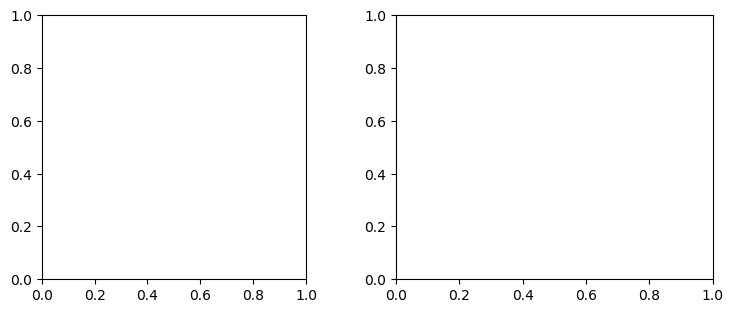

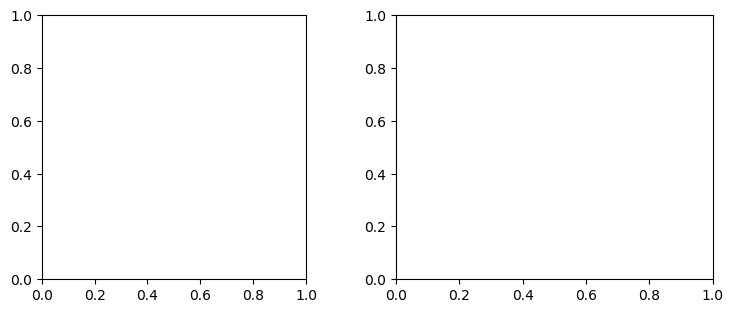

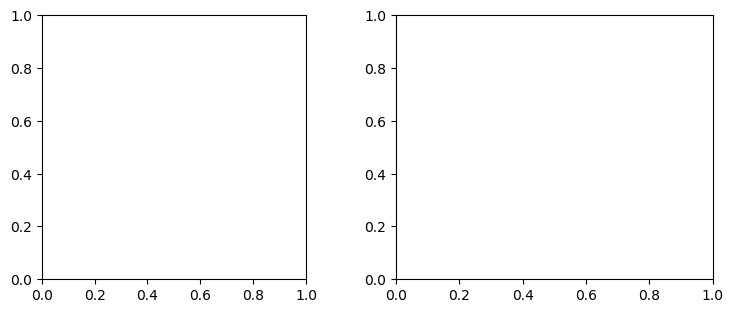

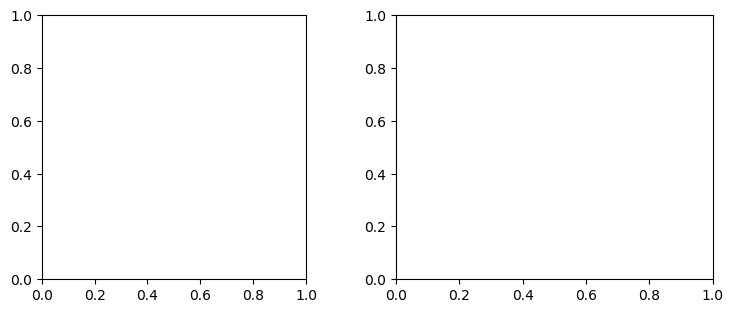

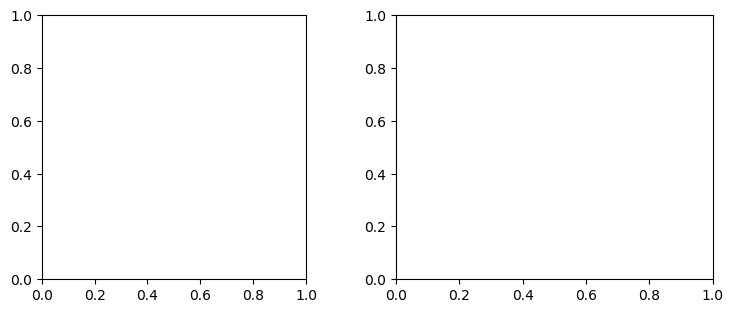

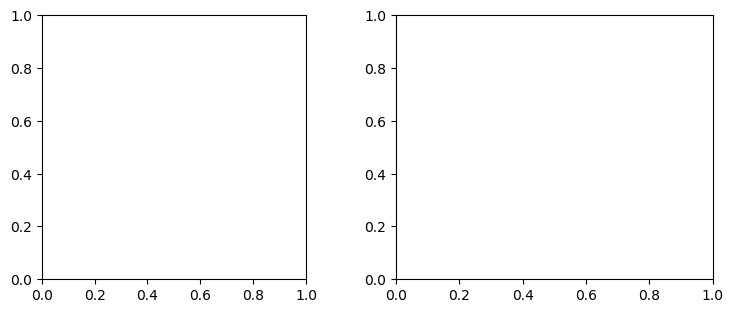

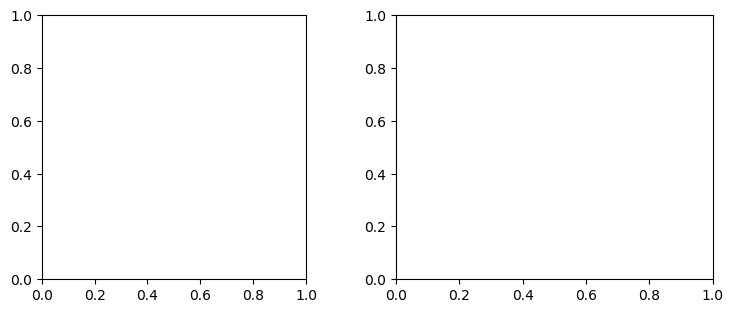

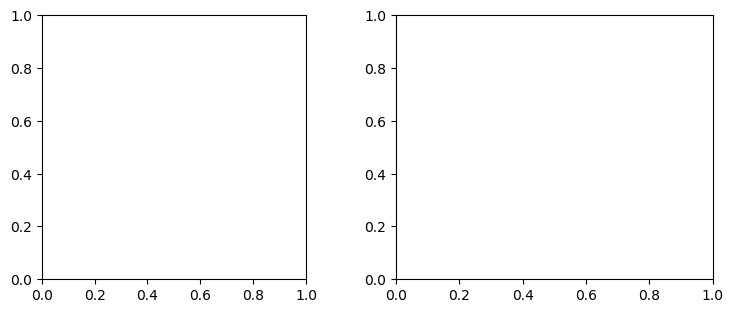

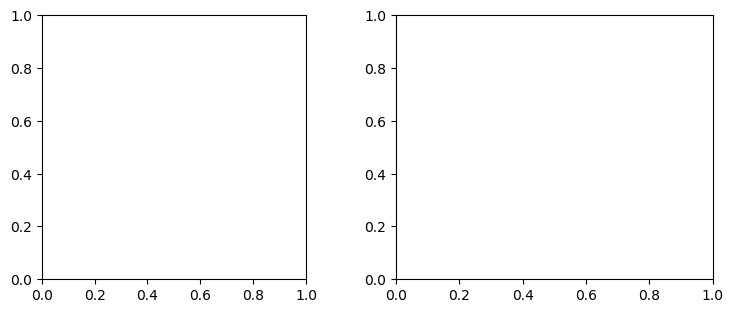

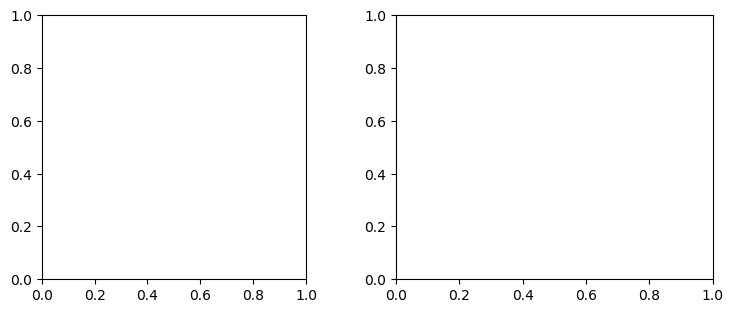

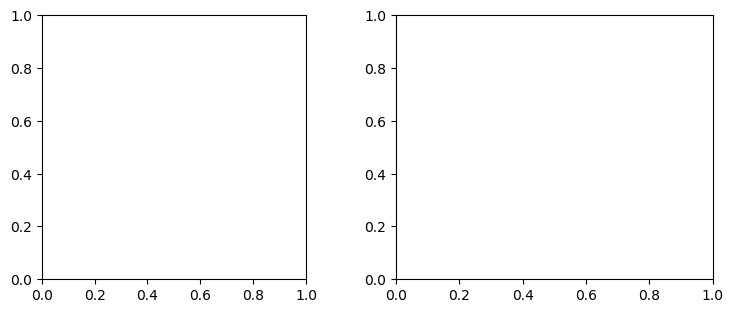

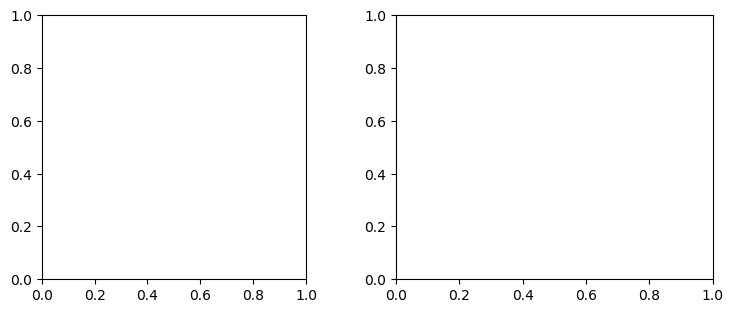

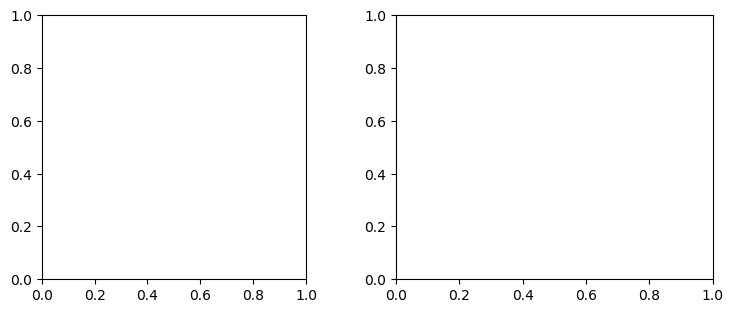

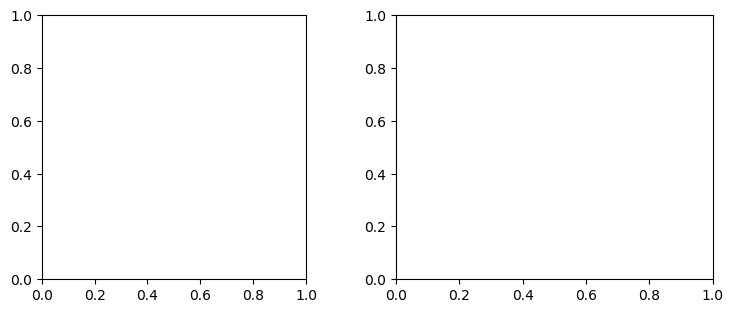

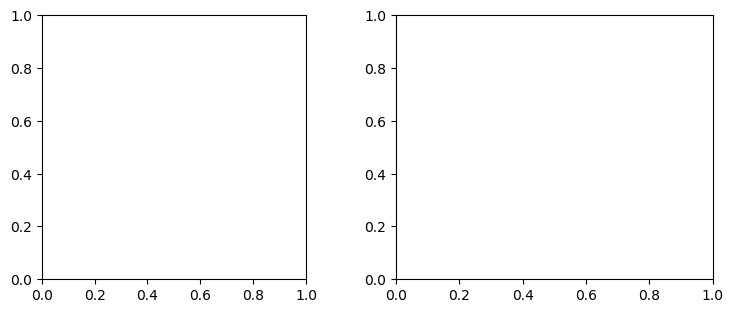

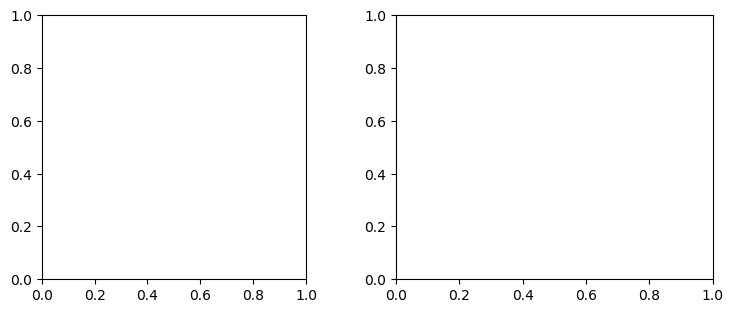

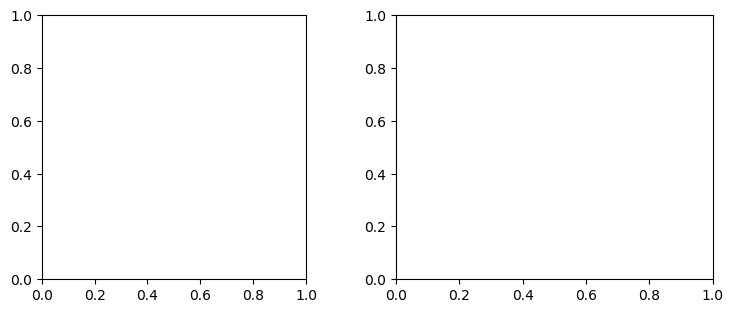

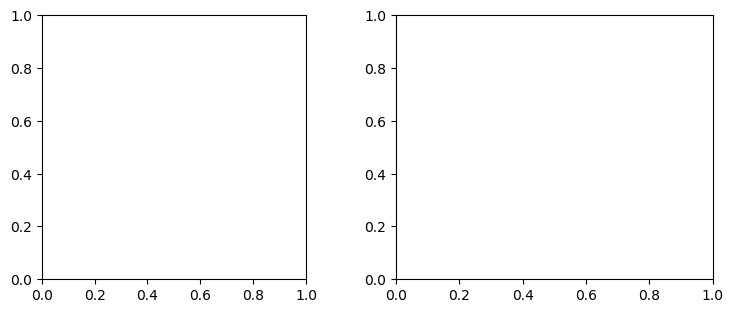

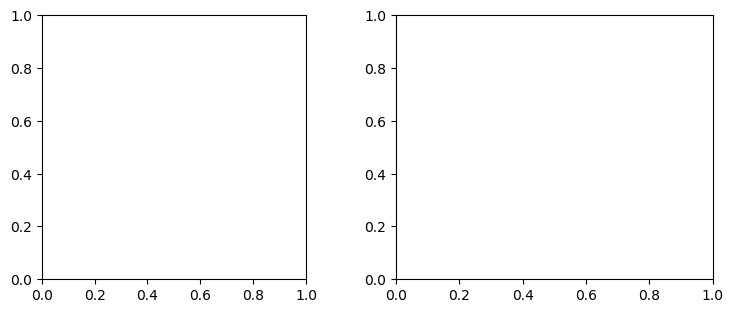

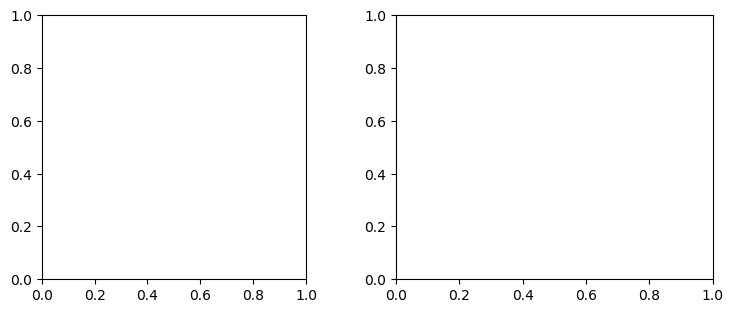

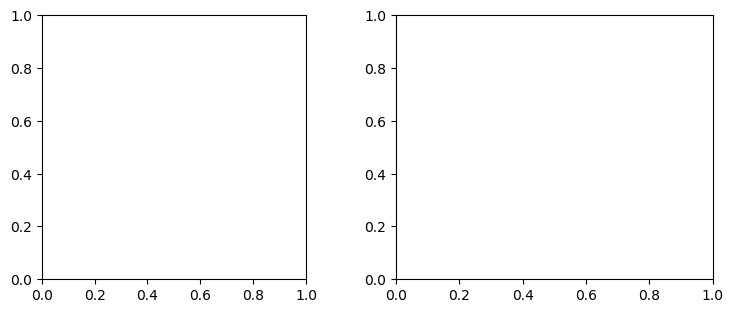

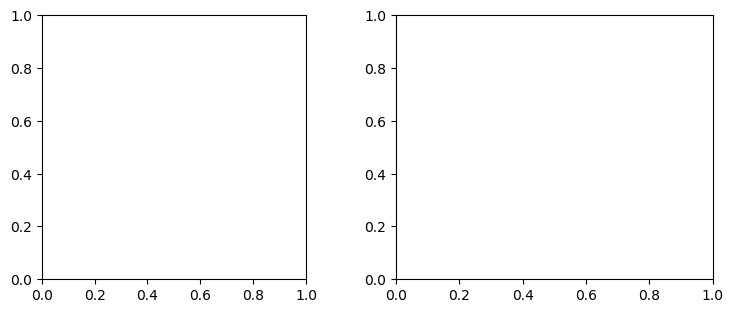

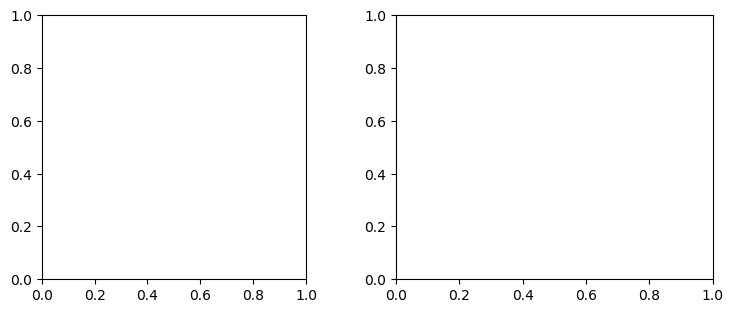

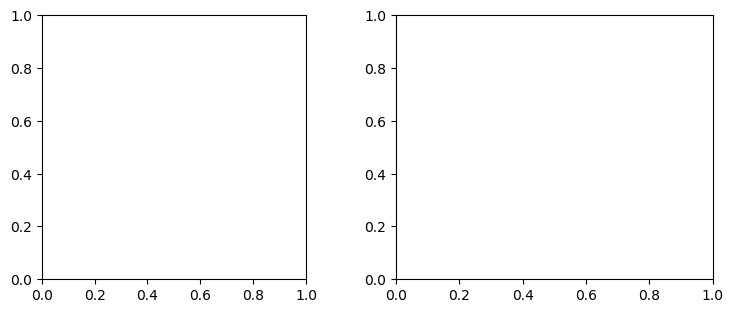

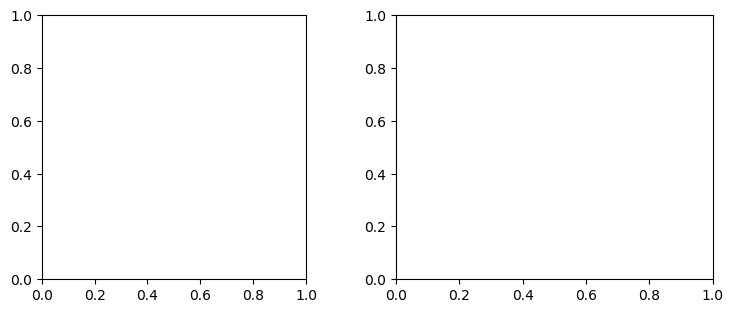

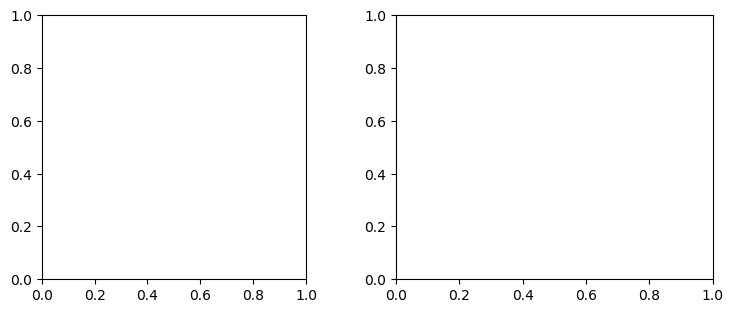

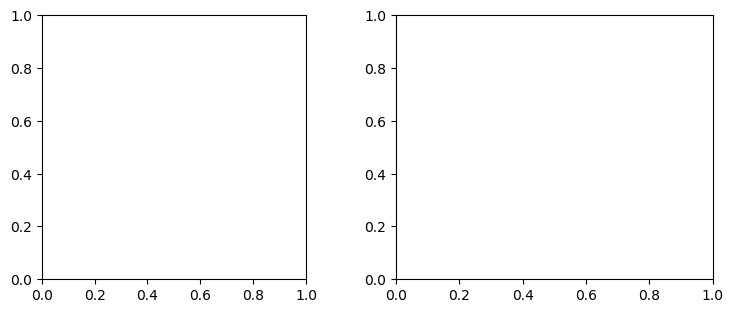

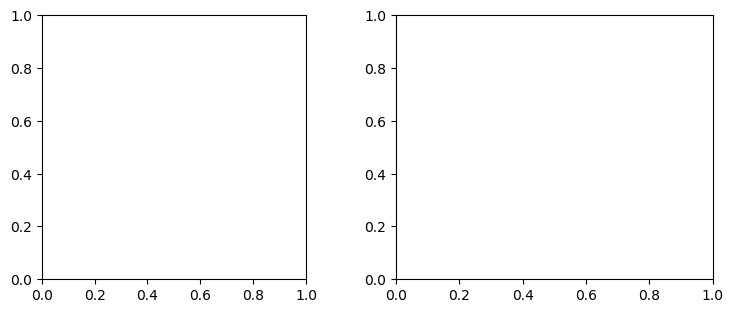

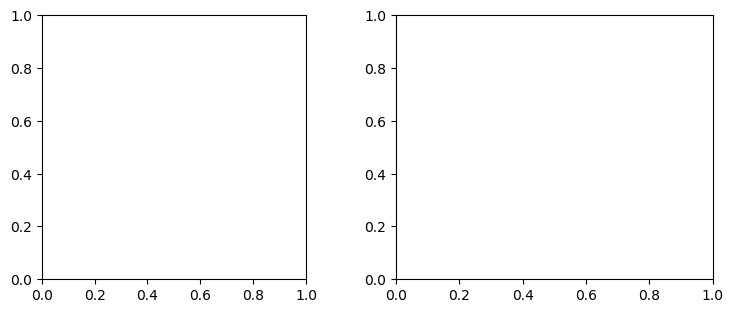

In [3]:
ifas.zulu.pipelines.SA201907281826_reduction_pipeline('./Data',first_run)

In [ ]:
__, __, data = ifas.meta.meta_faa.smeargle_open_fits_file("./Data/Saphria__num;19__detBias;8.5Vup__1025-1040.fits")

In [ ]:
data
print(np.nanmean(data.data),np.nanstd(data.data))

In [ ]:
first_run.OscarConfig.general_histogram_config['histogram_plot_paramters']['range'] = [-1000,1000]

figure = ifas.oscar.multi.plot_single_heatmap_and_histogram("./Data\Saphria__num;14__detBias;4.5Vdown__1025-1040.fits",first_run)
#figure.axes[1].axvline(np.nanmean(data.data))
plt.show(figure)

C:\Users\Tripp\Desktop\PROGRAM\IfA_Smeargle\meta\fits_and_arrays.py:118: InputWarning: The fits file contains an <IFASMASK> extension, a pixel mask created by this program. It will be applied to the data. The output data will be a Numpy Masked Array.
  smeargle_warning(InputWarning,("The fits file contains an <IFASMASK> extension, "
C:\Users\Tripp\Desktop\PROGRAM\IfA_Smeargle\oscar\heatmaps.py:88: MagicWarning: The colorbar location and scale are being set by magic values. Use this if and only if the pragmatic method fails.
  smeargle_warning(MagicWarning, "The colorbar location and scale are being set by magic "


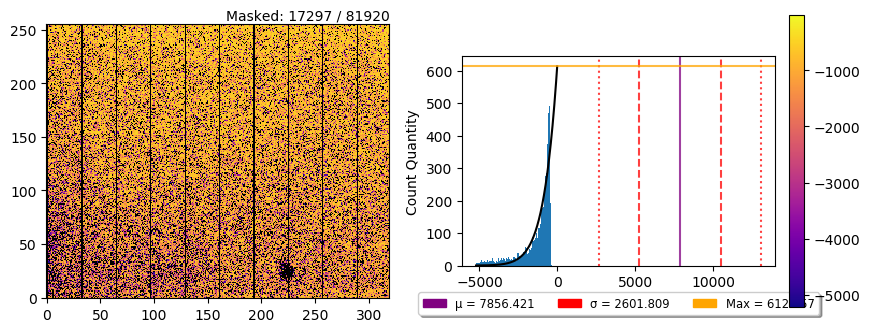

NameError: name 'figure3' is not defined

In [3]:
first_run.OscarConfig.general_histogram_config['fit_gaussian'] = True
first_run.OscarConfig.general_histogram_config['bin_width'] = 5
#first_run.OscarConfig.general_histogram_config['histogram_plot_paramters']['range'] = [-250,100]

__, __, data = ifas.meta.meta_faa.smeargle_open_fits_file("./Data/SAPHIRA-T40K__num;24__detBias;10.5Vdown__257-272.fits")
figure2 = ifas.oscar.multi.plot_single_heatmap_and_histogram(data,first_run)
#figure3 = ifas.oscar.multi.plot_single_heatmap_and_histogram(data.data,first_run)
#figure.axes[1].axvline(np.nanmean(data.data))
plt.show(figure2)
plt.show(figure3)

# [ 72 120 136 250 294]
#[-16074. -14058. -13386.  -8598.  -6750.]
ifas.meta.meta_plting.smeargle_save_figure_file(figure2,"website.png")
print(np.histogram(data.data,bins=10))

./Data\Saphria__num;14__detBias;4.5Vdown__257-272.fits


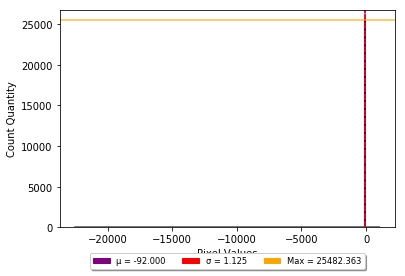

3.076137


In [7]:
__, __, data = ifas.meta.meta_faa.smeargle_open_fits_file("./Data\Saphria__num;14__detBias;4.5Vdown__257-272.fits")
figure2 = ifas.oscar.histograms.plot_array_histogram(data.data,bin_width=10,fit_gaussian=True)
#figure.axes[1].axvline(np.nanmean(data.data))
plt.show(figure2)

wee, weer = ifas.meta.meta_model.smeargle_fit_histogram_gaussian_function(data.data)

print(np.nanstd(data))

In [ ]:
# Extract histogram data from the data.
hist_data = np.histogram(data.data, bins=ifa.oscar.oscar_bin_width(data.data, 10))
hist_x = (hist_data[1][0:-1] + hist_data[1][1:]) / 2 # Middle of bin.
hist_y = hist_data[0]
   # Filter out some of the outlier pixels, consider only 75% of the 
    # meaningful bins and the bins with a value greater than a limiting entry.
valuecut_index = np.where(hist_y >= 11)
cuthist_x = np.array(hist_x[valuecut_index])
cuthist_y = np.array(hist_y[valuecut_index])

    # Initial guesses...
    # The peak of the data is a good guess for the mean value.
guess_mean = hist_x[np.argmax(cuthist_y)]
print(np.nanstd(cuthist_y))
print(sp_stat.median_absolute_deviation(cuthist_y))
print(sp_stat.variation(cuthist_y))

In [3]:
alfa = copy.deepcopy(first_run)
bravo = copy.deepcopy(first_run)

print(alfa)


< Configuration Class --- SmeargleConfig > 
╓ SmeargleConfig Parameters:
╟  BravoConfig ↴ 
< Configuration Class --- BravoConfig > 
╓ BravoConfig Parameters:
╟  detector_name ⇀ {'name': 'Saphria-T60K'}
╟  voltpat_rename_config ⇀ {'voltage_pattern': [2.5, 4.5, 6.5, 8.5, 9.5, 10.5, 11.5, 11.5, 10.5, 9.5, 8.5, 6.5, 4.5, 2.5], 'begin_garbage': 1, 'archive_data': False}
╟  avg_endpts_persec_config ⇀ {'start_chunk': None, 'end_chunk': None, 'frame_exposure_time': None}
╟  avg_endpts_perksec_config ⇀ {'start_chunk': None, 'end_chunk': None, 'frame_exposure_time': None}
╙------------------------------------------
</ Configuration Class --- BravoConfig >
╟  EchoConfig ↴ 
< Configuration Class --- EchoConfig > 
╓ EchoConfig Parameters:
╟  echo010_config ⇀ {'run': False}
╟  echo120_config ⇀ {'run': False, 'x_range': None, 'y_range': None}
╟  echo170_config ⇀ {'run': True, 'sigma_multiple': 5, 'bin_size': 5}
╟  echo270_config ⇀ {'run': False, 'minimum_value': None}
╟  echo271_config ⇀ {'run': Fal

In [5]:
del alfa.BravoConfig

In [16]:
charlie = ifas.yankee.fast_forward_configuration_class(bravo)

In [4]:
print(ifas.yankee.fast_forward_configuration_class(alfa))
print(alfa)
print(ifas.yankee.SmeargleConfig())


< Configuration Class --- SmeargleConfig > 
╓ SmeargleConfig Parameters:
╟  BravoConfig ↴ 
< Configuration Class --- BravoConfig > 
╓ BravoConfig Parameters:
╟  detector_name ⇀ {'name': 'Saphria-T60K'}
╟  voltpat_rename_config ⇀ {'voltage_pattern': [2.5, 4.5, 6.5, 8.5, 9.5, 10.5, 11.5, 11.5, 10.5, 9.5, 8.5, 6.5, 4.5, 2.5], 'begin_garbage': 1, 'archive_data': False}
╟  avg_endpts_persec_config ⇀ {'start_chunk': None, 'end_chunk': None, 'frame_exposure_time': None}
╟  avg_endpts_perksec_config ⇀ {'start_chunk': None, 'end_chunk': None, 'frame_exposure_time': None}
╙------------------------------------------
</ Configuration Class --- BravoConfig >
╟  EchoConfig ↴ 
< Configuration Class --- EchoConfig > 
╓ EchoConfig Parameters:
╟  echo010_config ⇀ {'run': False}
╟  echo120_config ⇀ {'run': False, 'x_range': None, 'y_range': None}
╟  echo170_config ⇀ {'run': True, 'sigma_multiple': 5, 'bin_size': 5}
╟  echo270_config ⇀ {'run': False, 'minimum_value': None}
╟  echo271_config ⇀ {'run': Fal